Let us start with importing necessary libraries

In [1]:
import csv, urllib.request #dataset download
from sklearn import preprocessing #preprocessing of the dataset
encoder = preprocessing.LabelEncoder()
from sklearn import tree
import numpy as np #data processing
from sklearn.model_selection import train_test_split #library processing the data split
from scipy.sparse.construct import random
from array import array
import graphviz #visualization of decision trees
from sklearn.metrics import confusion_matrix #generation of the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns; 

As we are using the text values, to have a value out of it and for easier understanding, we are encoding each feature and label. To reiterate, we are assigning numerical value to each breed of dog, type of cancer, etc.

We are encoding the values from the specific rows, to have the numerical values

In [2]:
#create a new lists for two datasets to minimize the number of requests to the server
test_dataset_1=[0]
test_dataset_2=[0]

#set an url for the csv files and download them
url1 = 'http://moniak.me/agh/dataset/test_dataset_1.csv'
url2 = 'http://moniak.me/agh/dataset/test_dataset_2.csv'

response = urllib.request.urlopen(url1) #download test_dataset_1
lines = [l.decode('utf-8') for l in response.readlines()]
cr = csv.reader(lines)

#iterate through all of the rows to add them to the test_dataset_1
for row in cr:
  test_dataset_1.append(row)
  #try to convert dogs age to float
  try:
    test_dataset_1[-1][2] = float(test_dataset_1[-1][2])
  except ValueError:
    continue

response = urllib.request.urlopen(url2) #download test_dataset_2
lines = [l.decode('utf-8') for l in response.readlines()]
cr = csv.reader(lines)

#iterate through all of the rows to add them to the test_dataset_2
for row in cr:
  test_dataset_2.append(row)
  #try to convert dogs age to float
  try:
    test_dataset_2[-1][2] = float(test_dataset_2[-1][2])
  except ValueError:
    continue

In [3]:
test_dataset = [0]
#choose the dataset that will be used later during the execution of code
#in this Jupyter notebook only second dataset is presented, the first one can be used by changing datasetChoice value to 1
datasetChoice = 2
if datasetChoice == 1:
  test_dataset = test_dataset_1
elif datasetChoice == 2:
  test_dataset = test_dataset_2

#instead of two pops we do it in one line (start of the csv file and attributes row)
_, _, *test_dataset = test_dataset

#extract each of the values onto the separate variables
age = [row[2] for row in test_dataset]
sex = [row[1] for row in test_dataset]
dog_type = [row[0] for row in test_dataset]
cancer_type = [row[-1] for row in test_dataset]

#print the number of entries to make sure everything is correct
len(test_dataset)

282

Create a features array  which will be our dataset to compare

In [4]:
age_encoded = encoder.fit_transform(age)
sex_encoded = encoder.fit_transform(sex)
dog_type_encoded = encoder.fit_transform(dog_type)
cancer_encoded = encoder.fit_transform(cancer_type)

features = np.vstack((dog_type_encoded, sex_encoded, age_encoded)).T
X=features
y=np.array(cancer_encoded)

Splitting the entire dataset into four parts:


*   X_train - features used to train the algorithm
*   X_test - features used to test the algorithm
*   y_train - labels used to train the algorithm
*   y_test - lables used to test the algorithm

In [5]:
#you can choose the random state value according to your needs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

Now it is time to implement the main function which is DecisionTreeClassifier. The documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict). At this stage we use the basic settings with random state set to 0 to be able to recreate the results.

Then the tree is fit with the training data (X_train, y_train) to generate the proper nodes.

In [6]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

Let us generate the visual representation of the tree and save it to PDF file.

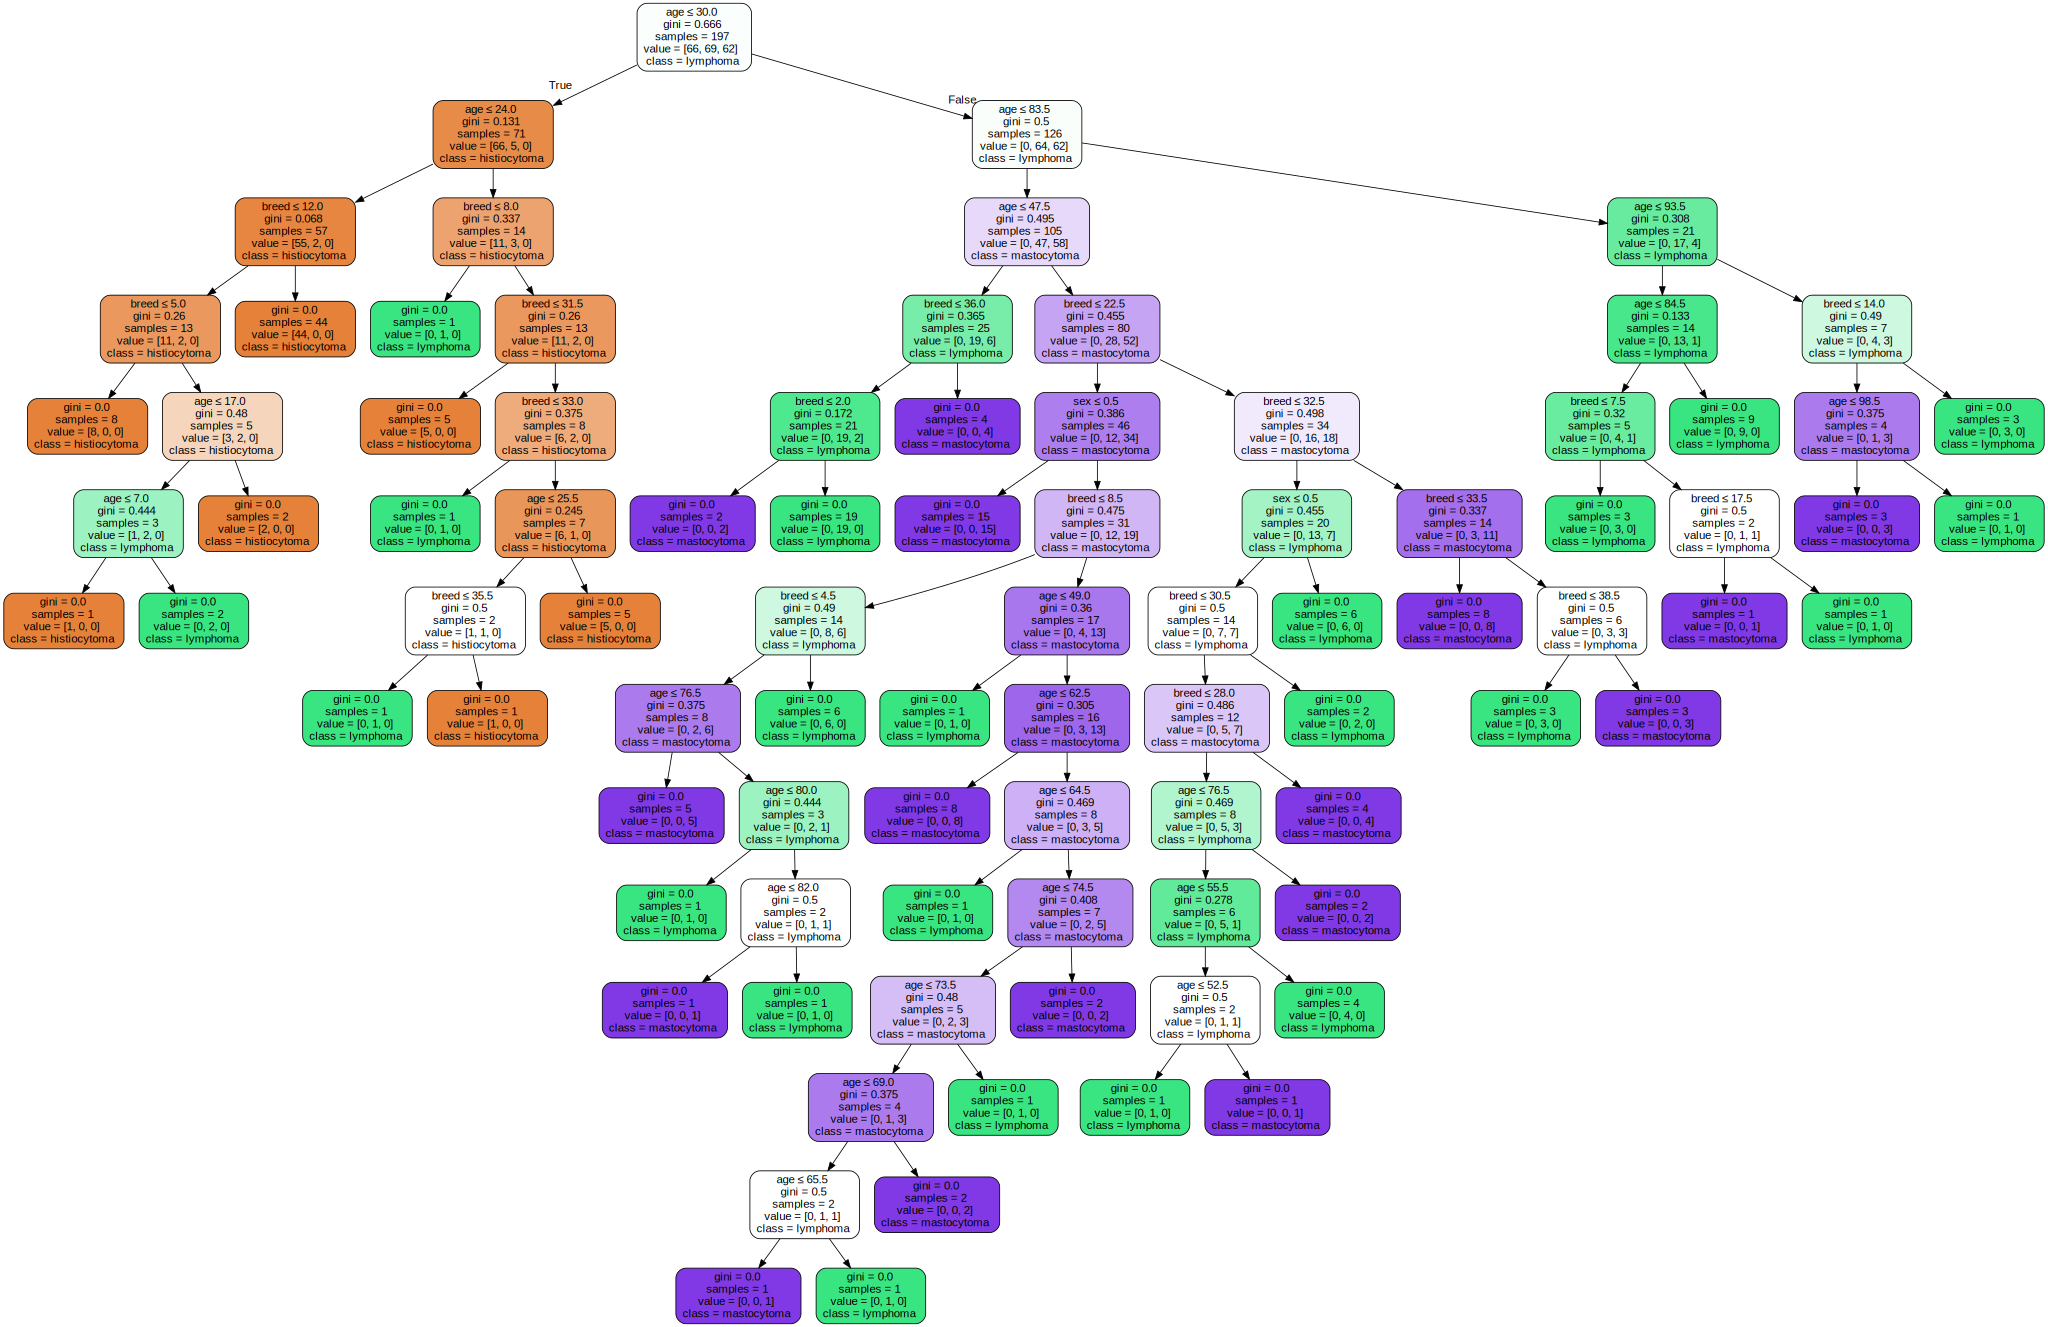

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["histiocytoma","lymphoma","mastocytoma"], feature_names=["breed","sex","age"])  
graph = graphviz.Source(dot_data)  
graph.render('doctest-output/test_database_2_2_e.gv').replace('\\', '/')
'doctest-output/test_database_2_2_e.pdf'
graph

In [8]:
#number of leafs as well as the values of the accuracy of the training and verification set
print("Tree - number of leafs: {:.0f}".format(clf.get_n_leaves()))
print("Accuracy - train: {:.3f}".format(clf.score(X_train,y_train)))
print("Accuracy - test: {:.3f}".format(clf.score(X_test,y_test)))

Tree - number of leafs: 45
Accuracy - train: 1.000
Accuracy - test: 0.847


Now let us create confusion matrices and generate the proper graphs

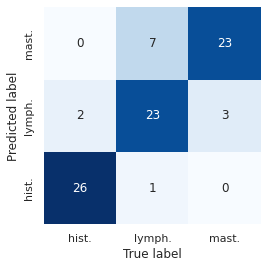

In [9]:
sns.set(rc={"figure.figsize":(6, 4)})
mat = confusion_matrix(clf.predict(X_test), y_test) #results of testing set are compared with the true labels
label_names = ['hist.','lymph.','mast.']
heatmap1 = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels = label_names, yticklabels = label_names, cmap="Blues")
heatmap1.invert_yaxis() #the y axis is inverted for more intuitive graph
plt.xlabel('True label')
plt.ylabel('Predicted label');
fig = heatmap1.get_figure()
fig.savefig('DT_heatmap_db_.pdf') #and the matrix is saved into the PDF file

The next blocks will represent the accuracy of the tree while changing the particular variable - in case of the first one - max depth of the tree for both gini and entropy

Max value for gini: 0.8470588235
Max value for gini: 0.8470588235


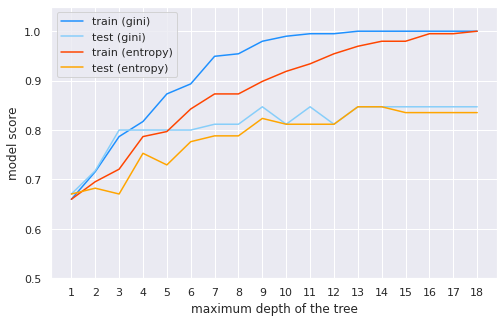

In [10]:
tr_g = []
te_g = []
tr_e = []
te_e = []
n = 18
for i in range(n):
    clf = tree.DecisionTreeClassifier(max_depth=i+1,random_state=0, criterion="gini")
    clf.fit(X_train,y_train)
    score_tr = clf.score(X_train,y_train)
    score_te = clf.score(X_test,y_test)
    tr_g.append(score_tr)
    te_g.append(score_te)
print("Max value for gini: {:.10f}".format(max(te_g)))

for i in range(n):
    clf = tree.DecisionTreeClassifier(max_depth=i+1,random_state=0, criterion="entropy")
    clf.fit(X_train,y_train)
    score_tr = clf.score(X_train,y_train)
    score_te = clf.score(X_test,y_test)
    tr_e.append(score_tr)
    te_e.append(score_te)
print("Max value for gini: {:.10f}".format(max(te_e)))

graph1 = plt.figure(figsize=(8,5))
plt.plot(range(1,n+1),tr_g,color='dodgerblue',label='train (gini)')
plt.plot(range(1,n+1),te_g,color='lightskyblue',label='test (gini)')
plt.plot(range(1,n+1),tr_e,color='orangered',label='train (entropy)')
plt.plot(range(1,n+1),te_e,color='orange',label='test (entropy)')
plt.xticks(range(1,n+1))
plt.ylim([0.5,1.05])
plt.xlabel('maximum depth of the tree')
plt.ylabel('model score')
plt.legend()
plt.savefig('db_2_2_graph_max_depth.pdf')
plt.show()

This part of code shows the changes when the minimum number of elements is needed to make a split...

Max value for gini: 0.8588235294
Max value for gini: 0.8705882353


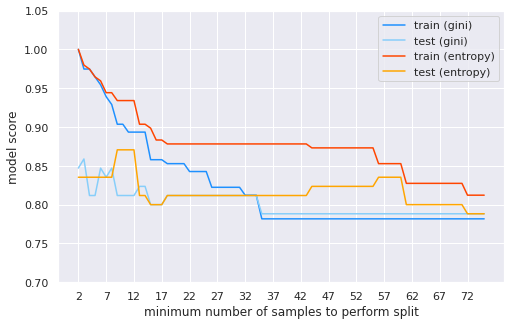

In [11]:
tr_g = []
te_g = []
tr_e = []
te_e = []
n = 75
for i in range(1,n):
    clf = tree.DecisionTreeClassifier(min_samples_split=i+1,random_state=0, criterion="gini")
    clf.fit(X_train,y_train)
    score_tr = clf.score(X_train,y_train)
    score_te = clf.score(X_test,y_test)
    tr_g.append(score_tr)
    te_g.append(score_te)
print("Max value for gini: {:.10f}".format(max(te_g)))

for i in range(1,n):
    clf = tree.DecisionTreeClassifier(min_samples_split=i+1,random_state=0, criterion="entropy")
    clf.fit(X_train,y_train)
    score_tr = clf.score(X_train,y_train)
    score_te = clf.score(X_test,y_test)
    tr_e.append(score_tr)
    te_e.append(score_te)
print("Max value for gini: {:.10f}".format(max(te_e)))

graph1 = plt.figure(figsize=(8,5))
plt.plot(range(2,n+1),tr_g,color='dodgerblue',label='train (gini)')
plt.plot(range(2,n+1),te_g,color='lightskyblue',label='test (gini)')
plt.plot(range(2,n+1),tr_e,color='orangered',label='train (entropy)')
plt.plot(range(2,n+1),te_e,color='orange',label='test (entropy)')
plt.xticks(range(2,n+1,5))
plt.ylim([0.7,1.05])
plt.xlabel('minimum number of samples to perform split')
plt.ylabel('model score')
plt.legend()
plt.savefig('db_2_2_graph_min_split.pdf')
plt.show()

...and this one shows the results of the the tuning of the minimum leaf size.

Max value for gini: 0.8588235294
Max value for gini: 0.8705882353


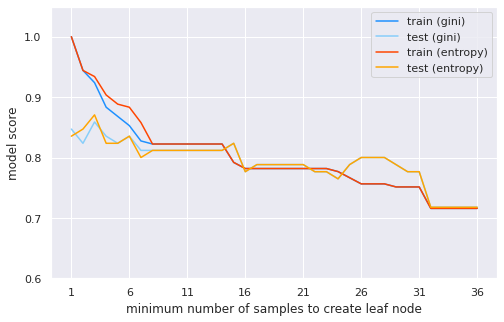

In [12]:
tr_g = []
te_g = []
tr_e = []
te_e = []
n = 36
for i in range(n):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=i+1,random_state=0, criterion="gini")
    clf.fit(X_train,y_train)
    score_tr = clf.score(X_train,y_train)
    score_te = clf.score(X_test,y_test)
    tr_g.append(score_tr)
    te_g.append(score_te)
print("Max value for gini: {:.10f}".format(max(te_g)))

for i in range(n):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=i+1,random_state=0, criterion="entropy")
    clf.fit(X_train,y_train)
    score_tr = clf.score(X_train,y_train)
    score_te = clf.score(X_test,y_test)
    tr_e.append(score_tr)
    te_e.append(score_te)
print("Max value for gini: {:.10f}".format(max(te_e)))

graph1 = plt.figure(figsize=(8,5))
plt.plot(range(1,n+1),tr_g,color='dodgerblue',label='train (gini)')
plt.plot(range(1,n+1),te_g,color='lightskyblue',label='test (gini)')
plt.plot(range(1,n+1),tr_e,color='orangered',label='train (entropy)')
plt.plot(range(1,n+1),te_e,color='orange',label='test (entropy)')
plt.xticks(range(1,n+1,5))
plt.ylim([0.6,1.05])
plt.xlabel('minimum number of samples to create leaf node')
plt.ylabel('model score')
plt.legend()
plt.savefig('db_2_2_graph_min_leaf.pdf')
plt.show()

Now let us plot the tree once again, this time with the best values that we got from the graphs above.

Accuracy - train: 0.924
Accuracy - test: 0.859
30


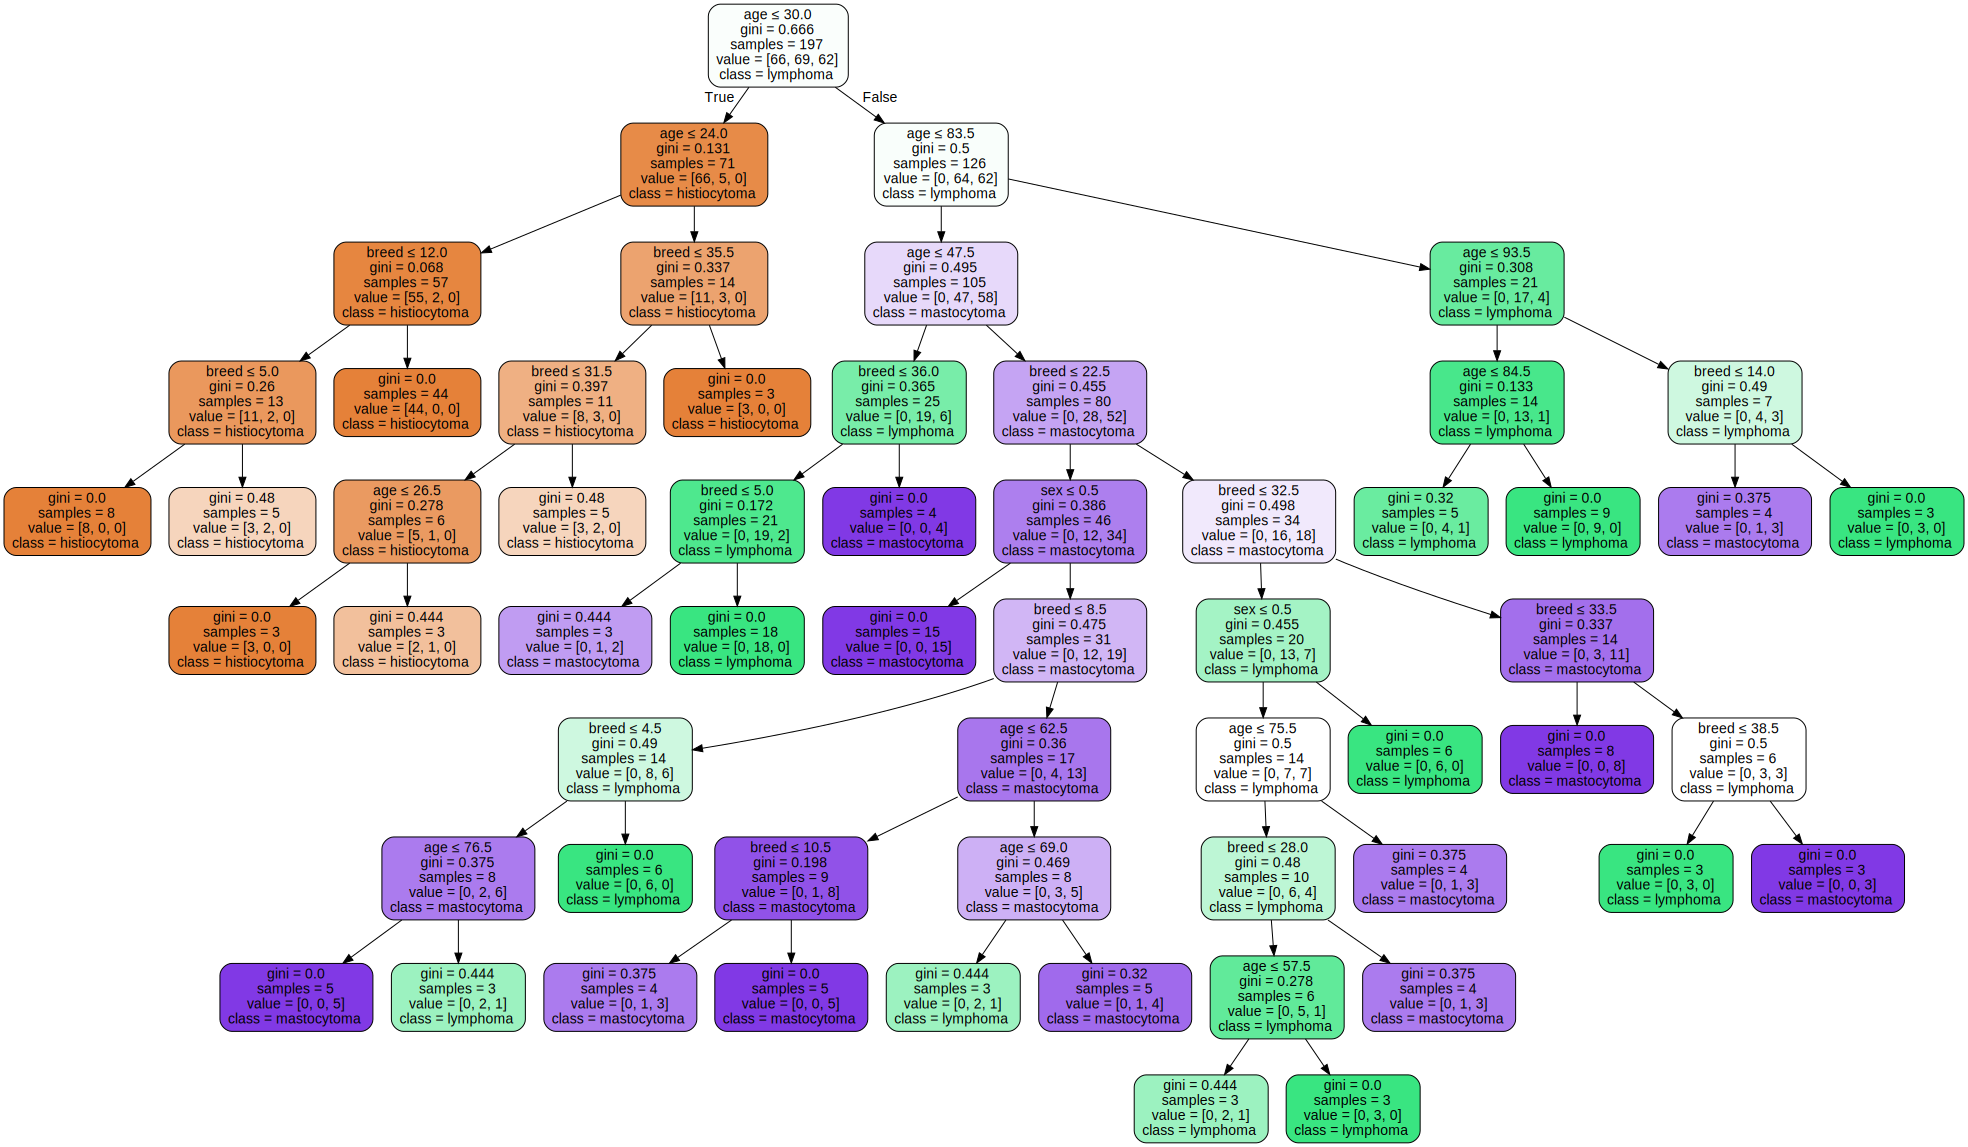

In [13]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=11, min_samples_split=3, min_samples_leaf=3)
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["histiocytoma","lymphoma","mastocytoma"], feature_names=["breed","sex","age"])  
graph = graphviz.Source(dot_data)  
graph.render('doctest-output/test_database_2_2_after_gini.gv').replace('\\', '/')
'doctest-output/test_database_2_2_after_gini.pdf'
print("Accuracy - train: {:.3f}".format(clf.score(X_train,y_train)))
print("Accuracy - test: {:.3f}".format(clf.score(X_test,y_test)))
print(clf.get_n_leaves())
graph

And let us see the differences in the confusion matrices, where the first one is for gini index.

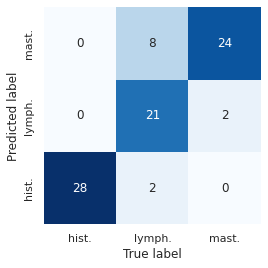

In [14]:
sns.set(rc={"figure.figsize":(6, 4)})
mat = confusion_matrix(clf.predict(X_test), y_test)
label_names = ['hist.','lymph.','mast.']
heatmap1 = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels = label_names, yticklabels = label_names, cmap="Blues")
heatmap1.invert_yaxis()

plt.xlabel('True label')
plt.ylabel('Predicted label');

fig = heatmap1.get_figure()
fig.savefig('DT_heatmap_db_2_2_gini_final.pdf')

Now the tree for entropy

Accuracy - train: 0.924
Accuracy - test: 0.871
25


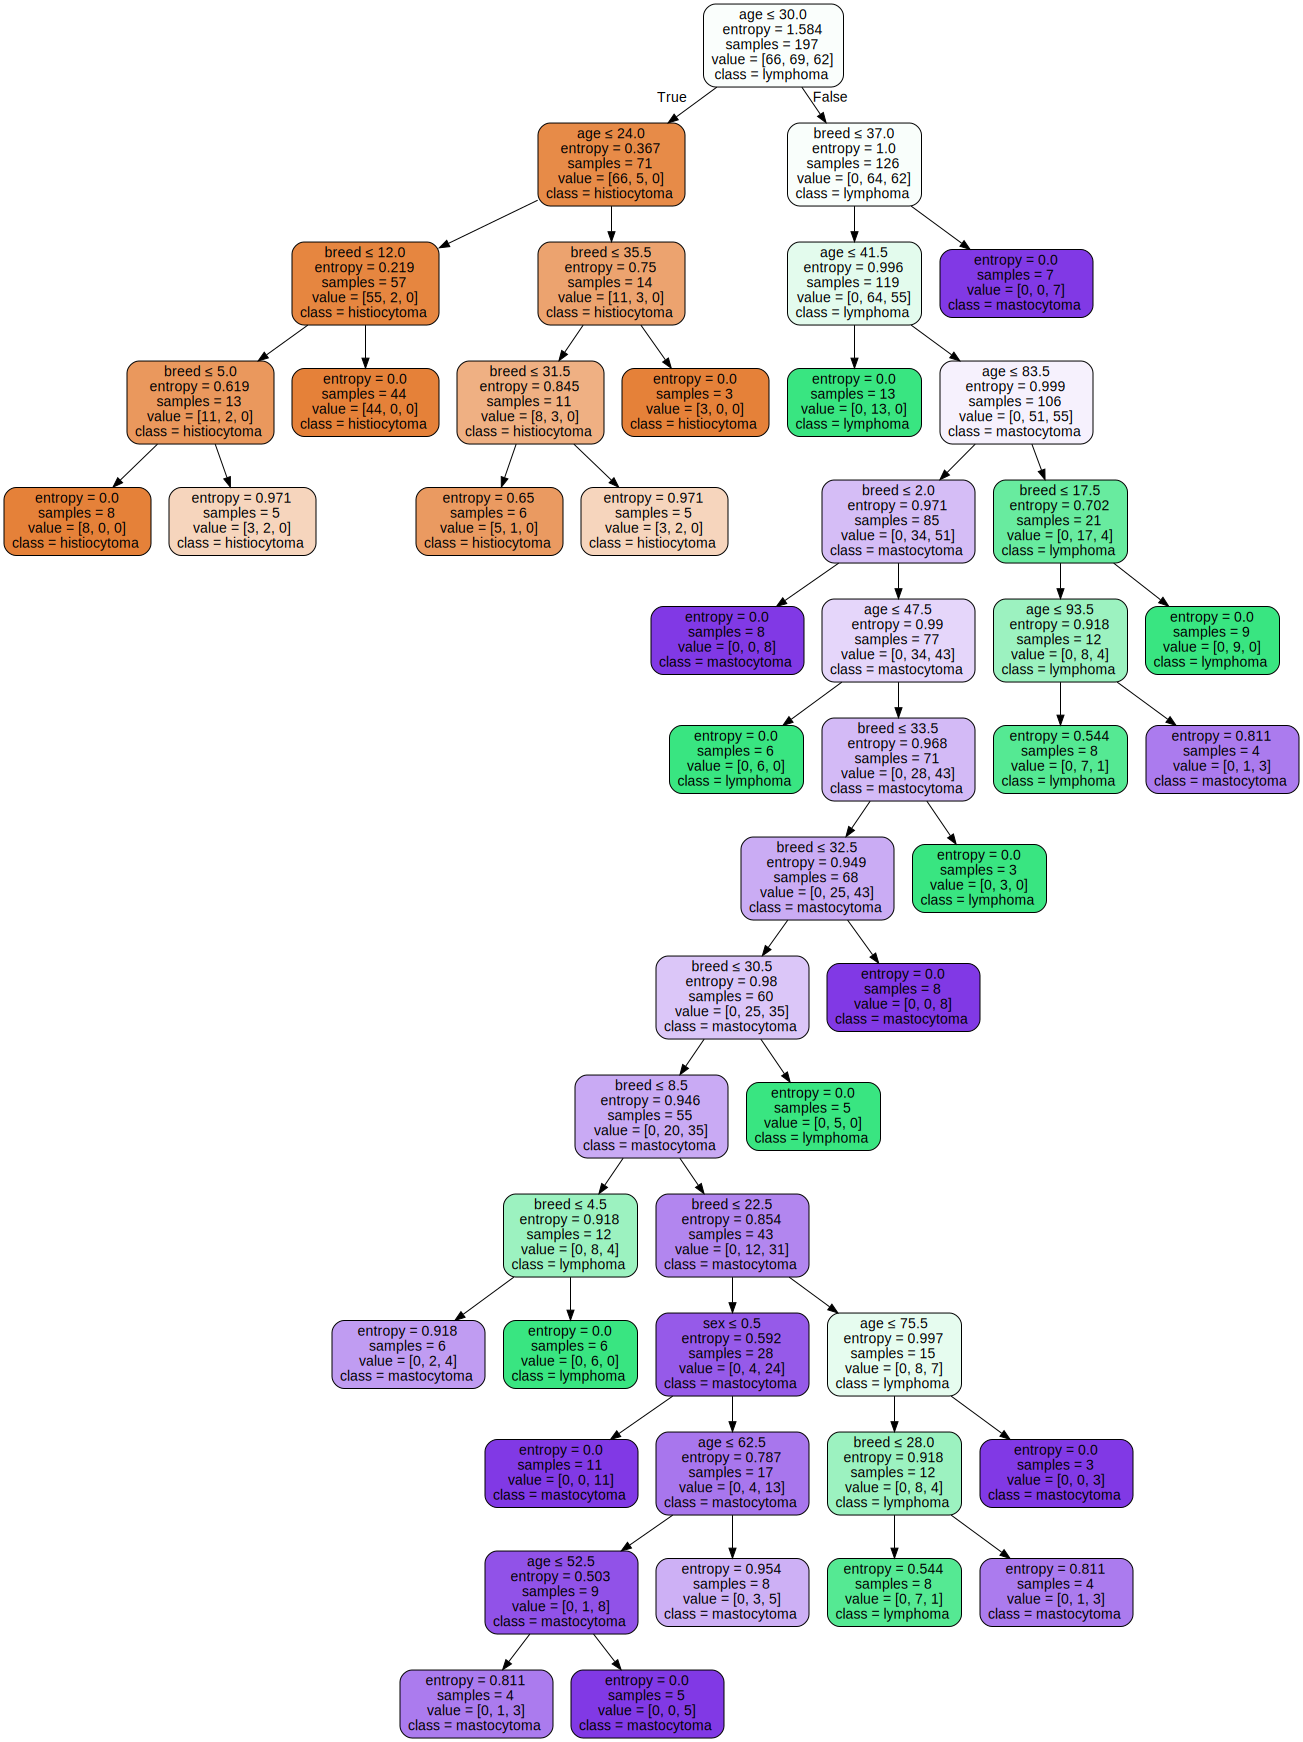

In [15]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=14, min_samples_split=9, min_samples_leaf=3, criterion="entropy")
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["histiocytoma","lymphoma","mastocytoma"], feature_names=["breed","sex","age"])  
graph = graphviz.Source(dot_data)  
graph.render('doctest-output/test_database_2_2_after_entr.gv').replace('\\', '/')
'doctest-output/test_database_2_2_after_entr.pdf'
print("Accuracy - train: {:.3f}".format(clf.score(X_train,y_train)))
print("Accuracy - test: {:.3f}".format(clf.score(X_test,y_test)))
print(clf.get_n_leaves())
graph

And the confusion matrix for entropy.

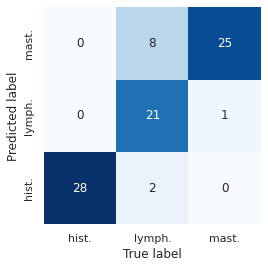

In [16]:
sns.set(rc={"figure.figsize":(6, 4)}) 
mat = confusion_matrix(clf.predict(X_test), y_test)
label_names = ['hist.','lymph.','mast.']
heatmap1 = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels = label_names, yticklabels = label_names, cmap="Blues")
heatmap1.invert_yaxis()

plt.xlabel('True label')
plt.ylabel('Predicted label');

fig = heatmap1.get_figure()
fig.savefig('DT_heatmap_db_2_2_entr_final.pdf')